In [2]:
import matplotlib.pyplot as plt
from synthetic_data_gen import *
from astropy.io import fits
import pandas as pd
import numpy as np
from config import all_names
import os

manga_wave = np.load("../manga_wave.npy")


# Random Spectra

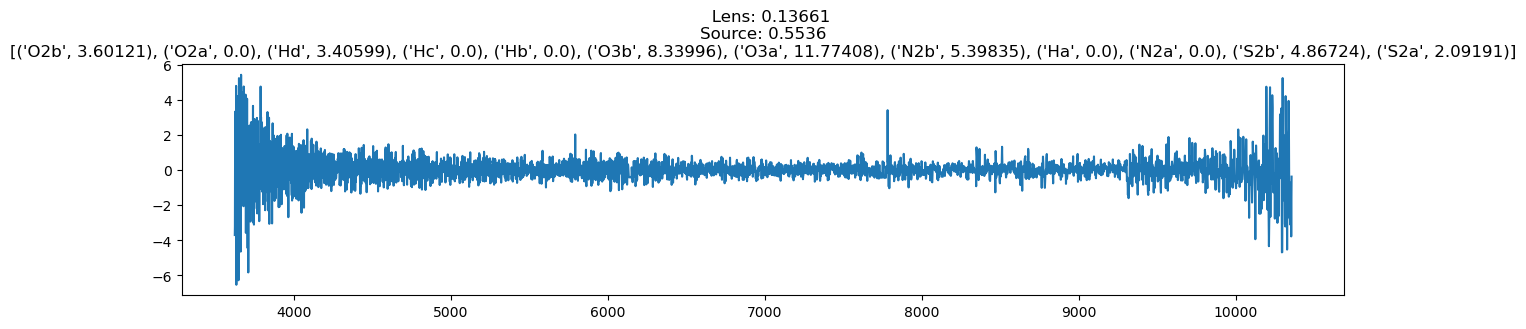

In [3]:
def get_random_spectra():
    path = "./training_data/data/"
    folder = np.random.choice(os.listdir(f"./training_data/data/"), size=1)[0]
    file = np.random.choice(os.listdir(f"./training_data/data/{folder}"), size=1)[0]
    dataset = pd.read_parquet(os.path.join(path, folder, file))
    idx = np.random.randint(len(dataset.spectra))
    random_spectra = {"spectra": dataset.spectra[idx], "labels": dataset.labels[idx]}
    return (random_spectra, folder)

spectra, folder = get_random_spectra()
plt.rcParams["figure.figsize"] = (15, 3)
title = f"   Lens: {folder[2:]}\n" + f"Source: {spectra['labels'][-1]:.4f}" + "\n" + str(list(zip(all_names, spectra["labels"])))
plt.title(title)
plt.plot(manga_wave, spectra["spectra"])
plt.show()

# Specific Spectra

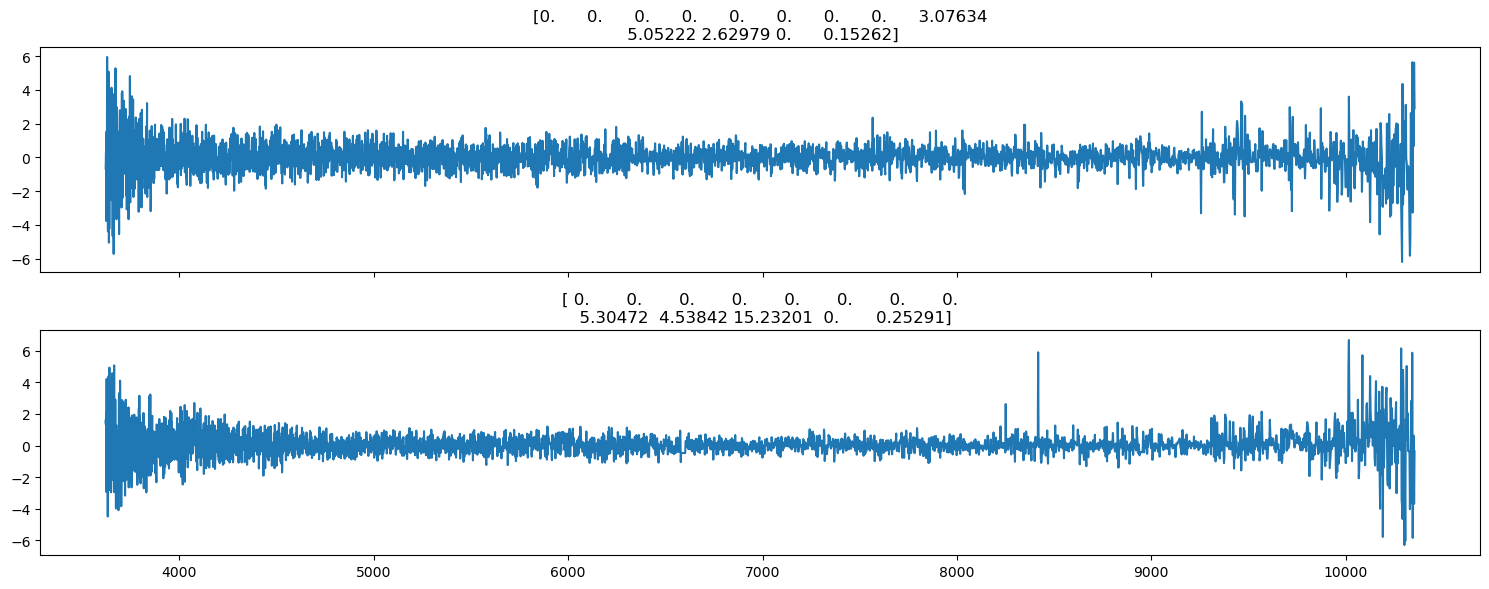

In [5]:
test = pd.read_parquet("./training_data/test_set/z_0.10036/Ha-N2a-S2b.parquet")
n=2
s=10
spectra = test["spectra"]
labels = test["labels"]

plt.rcParams["figure.figsize"] = (15, 3*n)
figs, axs = plt.subplots(nrows = n, ncols=1, sharex=True, tight_layout=True)

for i, ax in enumerate(axs):
    ax.plot(manga_wave, spectra[s+i])
    ax.set_title(labels[s+i])